# Titanic ML competition

In [1]:
#import librairies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Preprocessing, encoding etc..
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

#Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

print("Setup complete ! ")

Setup complete ! 


## Load Data

### Train Set

In [2]:
df_train = pd.read_csv('Data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

We have :
- 891 rows
- 12 columns

In [4]:
print(f'Number of passenger who died : {np.sum(df_train.Survived == 0)} ({np.round(np.sum(df_train.Survived == 0)/len(df_train),2)} %) ')
print(f'Number of passenger who survived : {np.sum(df_train.Survived == 1)} ({np.round(np.sum(df_train.Survived == 1)/len(df_train),2)} %) ')

Number of passenger who died : 549 (0.62 %) 
Number of passenger who survived : 342 (0.38 %) 


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- We have a lot of missing values for people's age

### Test Set

In [8]:
df_test = pd.read_csv('Data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print(f'length of test set :{len(df_test)}')

length of test set :418


In [10]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#We create a list with the two datasets so that when we want to modify something in both we can do it 
combine = [df_train, df_test]

## EDA

The target variable is 'Survived' so let's see the relation between this variables and the other ones 

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Pclass

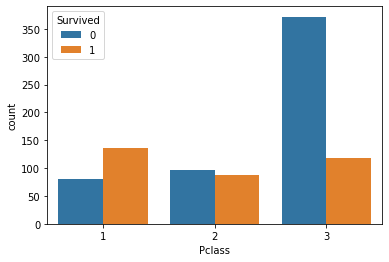

In [13]:
sns.countplot(data=df_train, x='Pclass', hue='Survived')
plt.show() 

- People from class one had the best chances of survival 

### Sex

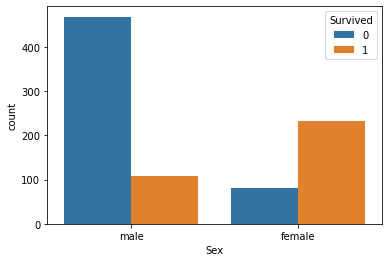

In [14]:
sns.countplot(data=df_train, x='Sex', hue='Survived')
plt.show() 

- Womens had the best chances of survival 

### Age

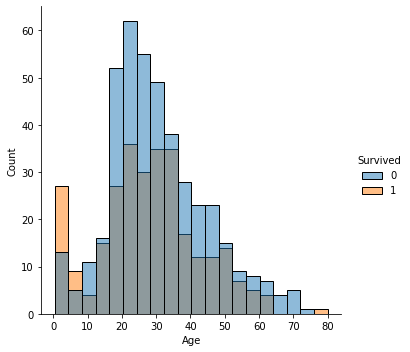

In [15]:
sns.displot(data=df_train, x='Age', hue='Survived')
plt.show() 

- Womens had the best chances of survival 

### SibSp

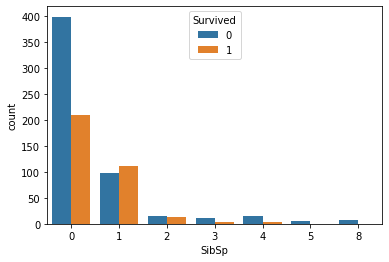

In [16]:
sns.countplot(data=df_train, x='SibSp', hue='Survived')
plt.show() 

### Parch

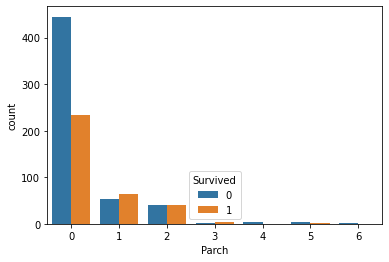

In [17]:
sns.countplot(data=df_train, x='Parch', hue='Survived')
plt.show() 

### Fare

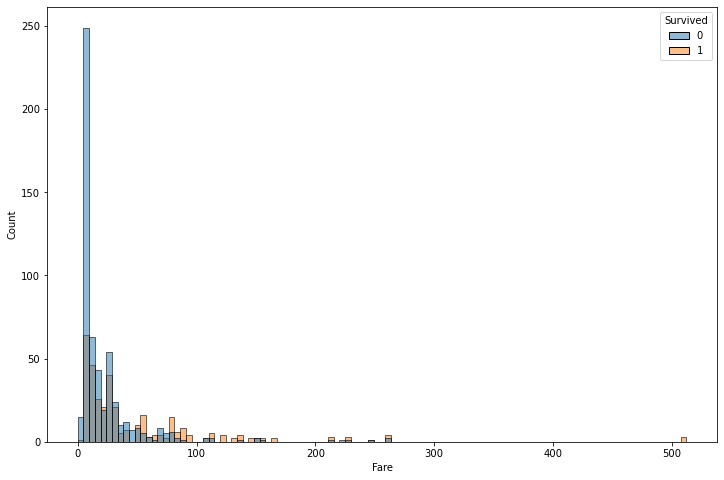

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_train, x='Fare', hue='Survived')
plt.show() 

### Embarked

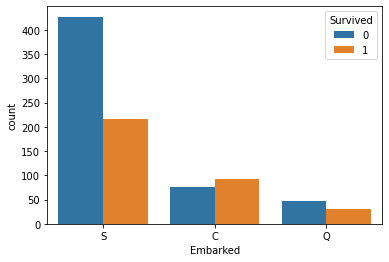

In [19]:
sns.countplot(data=df_train, x='Embarked', hue='Survived')
plt.show() 

<AxesSubplot:>

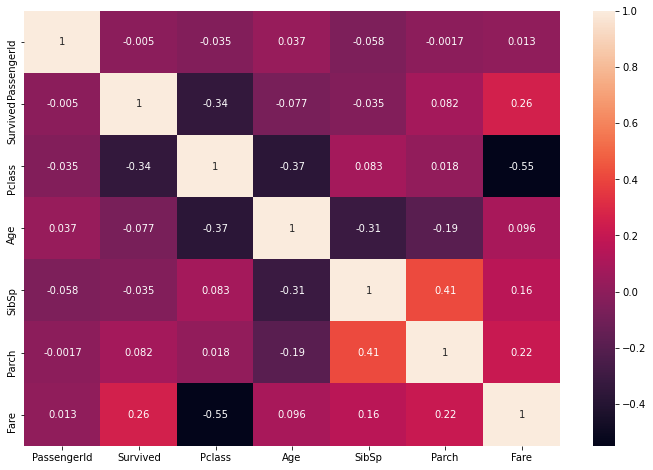

In [20]:
#Let's see the correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(),annot=True)

- There is no interesting correlation between variables except between the price of the ticket (Fare) and Survived

## Feature engineering

### Extracting the passenger titles

In [21]:
titles = set()
for name in df_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'the Countess', 'Dr', 'Don', 'Mlle', 'Sir', 'Mr', 'Master', 'Col', 'Capt', 'Lady', 'Major', 'Rev', 'Mme', 'Ms', 'Jonkheer', 'Mrs', 'Miss'}


In [22]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Royalty",
    "Lady" : "Royalty"
}

In [23]:
def get_titles(df):
    # we extract the title from each name
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    df['Title'] = df.Title.map(Title_Dictionary)
    return df

### Extracting family variables

In [24]:
def family(df):
    
    # introducing a new feature : the size of families (including the passenger)
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
    
    # introducing other features based on the family size
    df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return df

### Create our new variables

In [25]:
def feature_eng(df):
    df = get_titles(df)
    df = family(df)
    df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
    return df 

In [26]:
for data in combine:
    feature_eng(data)

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,0,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1,1,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1,1,0,0


In [28]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1,1,0,0
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2,0,1,0
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1,1,0,0
3,895,3,male,27.0,0,0,8.6625,S,Mr,1,1,0,0
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3,0,1,0


## Preprocessing

In [29]:
X_train , y_train = df_train.drop(['Survived', 'PassengerId'], axis=1), df_train.Survived
X_test = df_test.drop(['PassengerId'], axis=1)

In [30]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
X_train.isna().sum()

Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
FamilySize       0
Singleton        0
SmallFamily      0
LargeFamily      0
dtype: int64

In [32]:
X_test.isna().sum()

Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           1
FamilySize      0
Singleton       0
SmallFamily     0
LargeFamily     0
dtype: int64

In [33]:
#Impute missing values with different methods
def imputation(df):
    
    #df['Age'].fillna(df.Age.mean(), axis=0, inplace=True)
    #df['Age'].fillna(df.Age.median(), axis=0, inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode().iloc[0], axis=0, inplace=True)
    df['Fare'].fillna(df.Fare.mean(), axis=0, inplace=True)
    df['Title'].fillna(df['Title'].mode().iloc[0], axis=0, inplace=True)
    
    return df

In [34]:
#Encoding categorical variables
def encoding(df):
    
    ct = ColumnTransformer(transformers=
    [('knn_imputer', KNNImputer(),['Age']),
    ('ordinal_encoder', OrdinalEncoder(),['Sex']),
     ('one_hot_encoder', OneHotEncoder(), ['Embarked', 'Title']),
     ],
    remainder='passthrough')
    
    df = ct.fit_transform(df)
    
    return df

In [35]:
def preprocessing(df):
    
    df = imputation(df)
    df = encoding(df)
    
    return df

In [36]:
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)

## Modelling

### Evaluation

- To evaluate our model we'll be using a 5-fold cross validation with the accuracy since it's the metric that the competition uses in the leaderboard.

- To do that, we'll define a small scoring function.

In [37]:
def cv_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    print(f'Accuracy : {np.mean(xval)}')

### Feature selection

Feature selection comes with many benefits:

- It decreases redundancy among the data
- It speeds up the training process
- It reduces overfitting

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [38]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

In [39]:
features = pd.DataFrame()
features['feature'] = ['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked_S','Embarked_C','Embarked_Q',
                       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officier', 'Title_Royalty',
                       'FamilySize', 'Singleton', 'SmallFamily','LargeFamily'] 
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

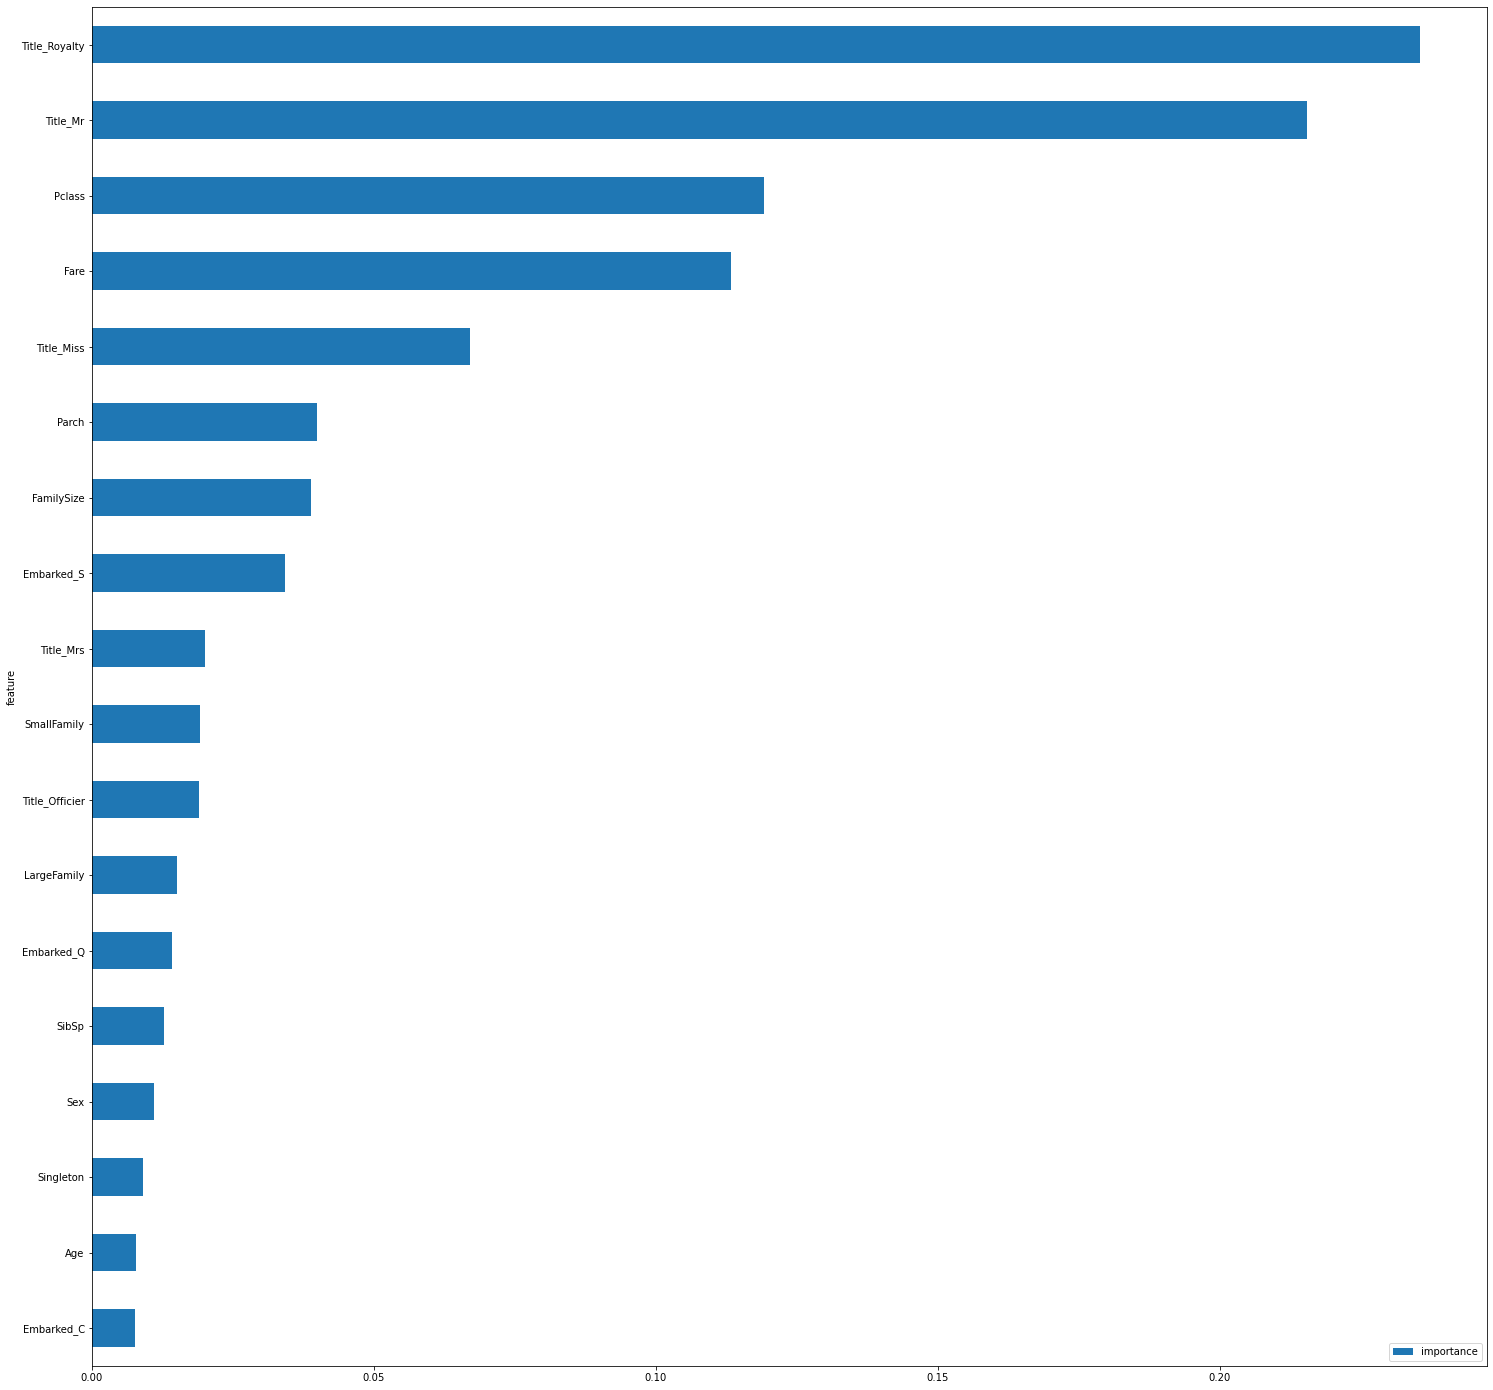

In [40]:
features.plot(kind='barh', figsize=(25, 25))

In [41]:
model = SelectFromModel(clf, prefit=True, threshold=0.015)
X_train_reduced = model.transform(X_train)
print(X_train_reduced.shape)

(891, 12)


In [42]:
X_test_reduced = model.transform(X_test)
print(X_test_reduced.shape)

(418, 12)


### Models

- Let's try different models and select the best one with his best parameters

In [43]:
#Different algorithms that we want to test
LogisticRegress = make_pipeline(PolynomialFeatures(2, include_bias=False),
                                StandardScaler(), 
                                LogisticRegression(random_state=0))

RandomForest = RandomForestClassifier(random_state=0)

XGBoost = XGBClassifier(eval_metric = 'logloss',random_state=0)

SVM = make_pipeline(PolynomialFeatures(2, include_bias=False),
                    StandardScaler(), 
                    SVC(random_state=0))

In [44]:
#Function to find the best parameters for each model 
def Grid_Search(model):
    
    grid = GridSearchCV(model, params, scoring='accuracy', cv=StratifiedKFold(n_splits=5),
                       )
    grid.fit(X_train_reduced,y_train)
    
    print("Best parameters by grid search:\n", grid.best_params_)
    
    return grid

#### Logistic Regression

In [45]:
cv_score(clf=LogisticRegress, X=X_train_reduced, y=y_train)

Accuracy : 0.8249199673592367


In [46]:
params = {'polynomialfeatures__degree' : [4,5,6],
          'logisticregression__C' : [0.01,0.1,0.15]}

In [47]:
LogisticRegress_tuned = Grid_Search(LogisticRegress)

Best parameters by grid search:
 {'logisticregression__C': 0.01, 'polynomialfeatures__degree': 4}


In [48]:
# Accuracy on train set
accuracy_logreg = LogisticRegress_tuned.score(X_train_reduced,y_train)

print(f"Accuracy: {accuracy_logreg}")

Accuracy: 0.8428731762065096


#### RandomForest

In [49]:
cv_score(clf=RandomForest, X=X_train_reduced, y=y_train)

Accuracy : 0.8193208210407382


In [50]:
params = {'n_estimators' : [300,400,500],
          'max_depth' : [2,3,4],
          'min_samples_split': [1, 2, 3],
          #'min_samples_leaf': [1, 3, 10],
         }

In [51]:
RandomForest_tuned = Grid_Search(RandomForest)

Best parameters by grid search:
 {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 400}


In [52]:
# Accuracy on train set
accuracy_rf = RandomForest_tuned.score(X_train_reduced,y_train)

print(f"Accuracy: {accuracy_rf}")

Accuracy: 0.8338945005611672


#### XGBoost

In [53]:
cv_score(clf=XGBoost, X=X_train_reduced, y=y_train)

Accuracy : 0.8215617349821104


In [54]:
params = {'n_estimators' : [5,10,15],
          'max_depth' : [5,8,10],
          'learning_rate' : [0.01,0.1]
         }

In [55]:
Xgboost_tuned = Grid_Search(XGBoost)

Best parameters by grid search:
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 15}


In [56]:
# Accuracy on train set
accuracy_xg = Xgboost_tuned.score(X_train_reduced,y_train)

print(f"Accuracy: {accuracy_xg}")

Accuracy: 0.8967452300785634


#### SVM

In [57]:
cv_score(clf=SVM, X=X_train_reduced, y=y_train)

Accuracy : 0.828253091456908


In [58]:
params = {'polynomialfeatures__degree':[3,4,5],
          'svc__gamma':[1e-2,1e-3, 1e-4],
          'svc__C':[500, 750, 900,1000]
         }

In [59]:
SVM_tuned = Grid_Search(SVM)

Best parameters by grid search:
 {'polynomialfeatures__degree': 3, 'svc__C': 750, 'svc__gamma': 0.0001}


In [60]:
# Accuracy on train set
accuracy_svm = SVM_tuned.score(X_train_reduced,y_train)

print(f"Accuracy: {accuracy_svm}")

Accuracy: 0.8507295173961841


## Conclusion

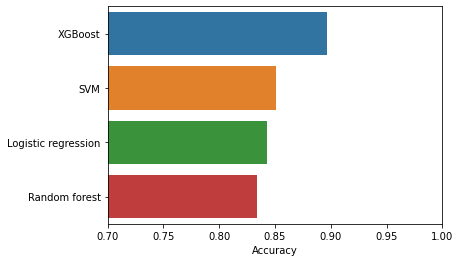

In [61]:
accuracy_df = pd.DataFrame({
    'Model': ['Random forest', 'SVM', 'XGBoost',
              'Logistic regression'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_xg, accuracy_logreg]
})

# Sort
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot
g = sns.barplot(data=accuracy_df_sorted, y='Model', x='Accuracy')
g.set(ylabel='', xlim=(0.7, 1))
plt.show()

## Results

### Final Model

- SVM and Xgboost gave the best results so we have decided to use a Stacking classifier with both

In [62]:
# The two best models
final_model = StackingClassifier(estimators=[('svm', SVM_tuned.best_estimator_), 
                                             ('xgb',Xgboost_tuned.best_estimator_)])

final_model.fit(X_train_reduced, y_train)
print(f'Accuracy on train set :{np.round(final_model.score(X_train_reduced, y_train),3)}')

Accuracy on train set :0.889


### Predictions and save 

In [63]:
# Predictions
predictions = final_model.predict(X_test_reduced)

# Save the results
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
output.to_csv('Data/submission.csv', index=False)
print("The results successfully saved!")

The results successfully saved!
